<h1 style='text-align:center'>Titanic.</h1>
<br>

![](http://media.giphy.com/media/1Nk9bIidJVTy0/giphy.gif)

# import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import train and test data.
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv') # the data of test have not "survived" information
name=train.Name 
train.head() # looking at the first rows data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0=dead,1=suvived;1=1st,2=2nd,3=3rd;sex;age;silbs(sister or brother,spouse);parch(parents or children) 
 

# data cleaning

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

use imputer method(sklearn.preprocessing.imputer) to deal with  "age "of missing value

In [6]:
from sklearn.impute import SimpleImputer #import module impute
Imp=SimpleImputer(missing_values=np.nan,strategy='median')#use median to fill the missing value of rows
new=Imp.fit_transform(train[['Age']])#from rows turns to columns

train['Age2']=new[:,0]#all rows and not choose any columns

In [7]:
train.isnull().sum() #there are not missing value of 'age2'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [8]:
train.drop('Age',axis=1,inplace=True)#axis=1 means columns

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [10]:
train.set_index('PassengerId',inplace=True)#use passengerid as index,case it is not nessesary
## get dummy variables for Column sex and embarked since they are categorical value.
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)
#sex:m ,f; embared:c,s,q,use get_dummies this function to read the difference catogries

In [11]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0,1,0,1


sex read automatically if sex=m then sex=1,if sex=f,then sex=0,two results we only read one way.
embarked read automatically if embarked=Q,Q=1,if embarked=S,S=1,if embarked=C,then embarked Q and S equal 0,three results we only read two ways

In [12]:
train['Fare'] = train['Fare'].astype(int)#change the type of 'fare' to int
#We divide the fares into four categories0,1,2,3
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

In [13]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,NaN,35.0,1,0,1


In [14]:
train['Age2']=train['Age2'].astype(int)#change the type of 'age2' to int
#We divide the age2 into four categories0,1,2,3,4
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [15]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,NaN,1,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,C85,2,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,NaN,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,C123,2,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,NaN,2,1,0,1


machine learning is deal with numeric ,so we have already change all var to numeric

In [16]:
# other var is char,these vars have not necessary,so we drop them
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


In [17]:
train.head()# so nice,all vars are numeric

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


# EDA，Explore the data

In [18]:
train.Survived.value_counts()# 0=dead=549,1=suvived=342

0    549
1    342
Name: Survived, dtype: int64

In [19]:
# survival rates
train.Survived.value_counts()/len(train)*100 # 61% for dead,38% for suvived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [20]:
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,1.288440,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,1.124206,0.812038,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [21]:
train.groupby('Sex_male').mean() #0=f,1=m,survived of female is 74%,male is 18%
#男性生存率和女性生存率是没有关系的，所以他们相加不可能是100%

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,1.210191,0.114650,0.646497
1,0.188908,2.389948,0.429809,0.235702,1.256499,1.331023,0.071057,0.764298


The overall survival rate was 38 percent, 74 percent for women and 19 percent for men

In [22]:
# Demonstrate the correlation degree using correlation matrix and heat map
train.corr() 

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.035715
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.016203
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,0.016203,0.125722,-0.496624,1.000000


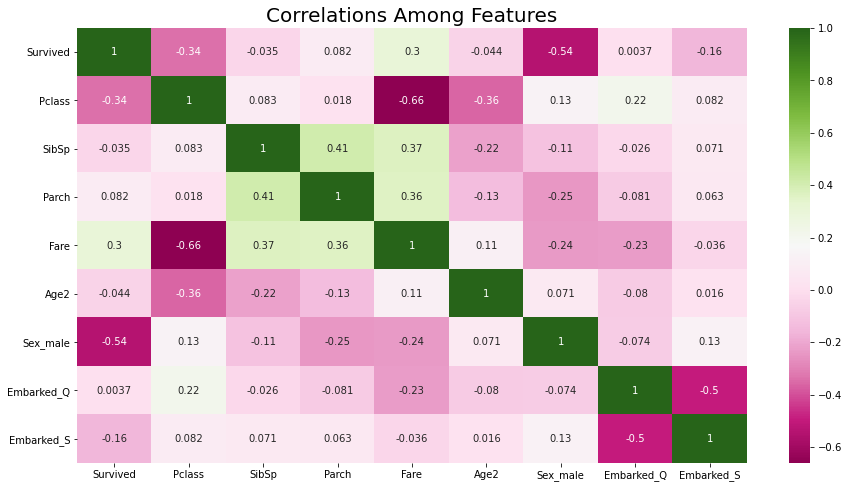

In [23]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

fare with survived have positively correlated ,reach 0.3;
sex_male with survived have negatively correlated,reach -0.54;
pclass with survived have negatively correlated ,reach -0.34;
fare with pclass have negatively correlated,reach-0.66(the higher fare,the higher pclass,pclass number is smaller);

([<matplotlib.axis.XTick at 0x17d5ac30ca0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

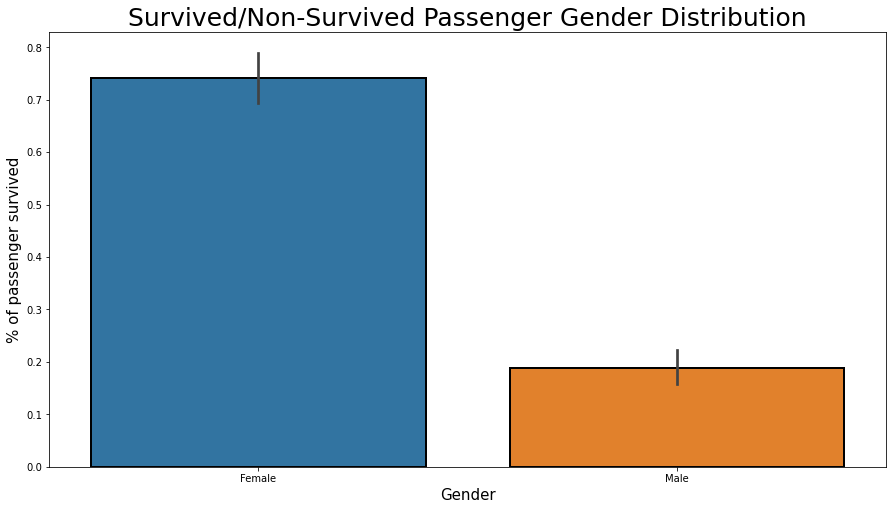

In [24]:
# Relationship between gender and survival rate
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex_male", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train.Sex_male.unique()), labels)

female survived is 74%,male survived is 19%

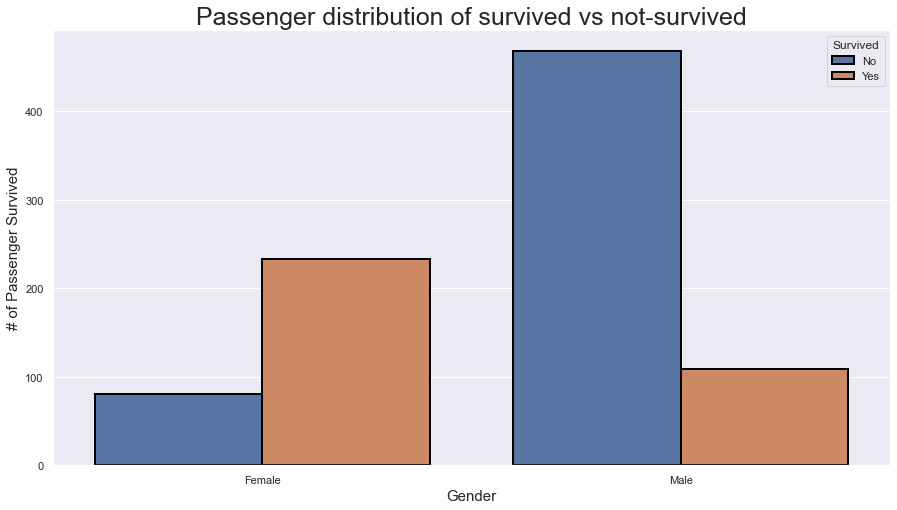

In [25]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

Conclusion In this disaster, ladies take precedence

In [26]:
# pclass and survival rate(1=first class(best),2=second class....)
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


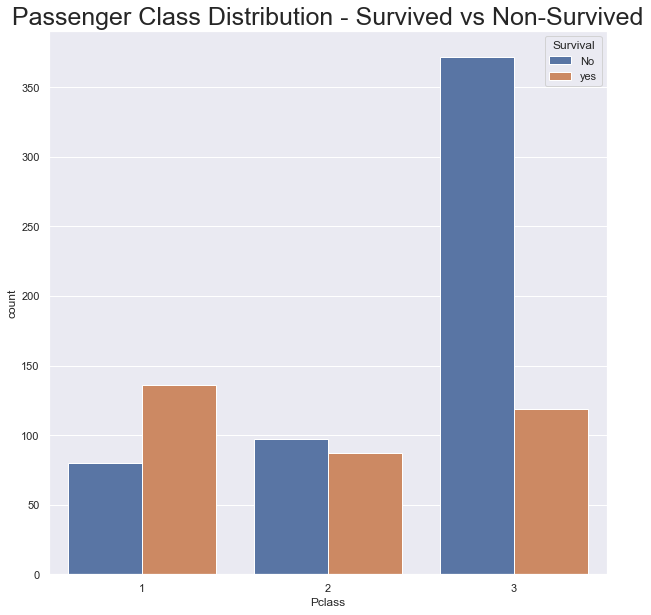

In [27]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

First class guest survival rate is 63%, Second Class Guest Survival Rate is 48%, Third Class Guest Survival Rate is 24%

([<matplotlib.axis.XTick at 0x17d5985c9d0>,
 [Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')])

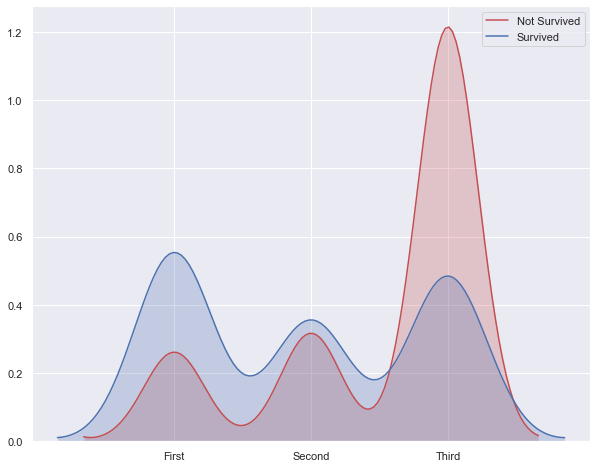

In [28]:
#use another ways 
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

Text(0.5, 0, 'Fare')

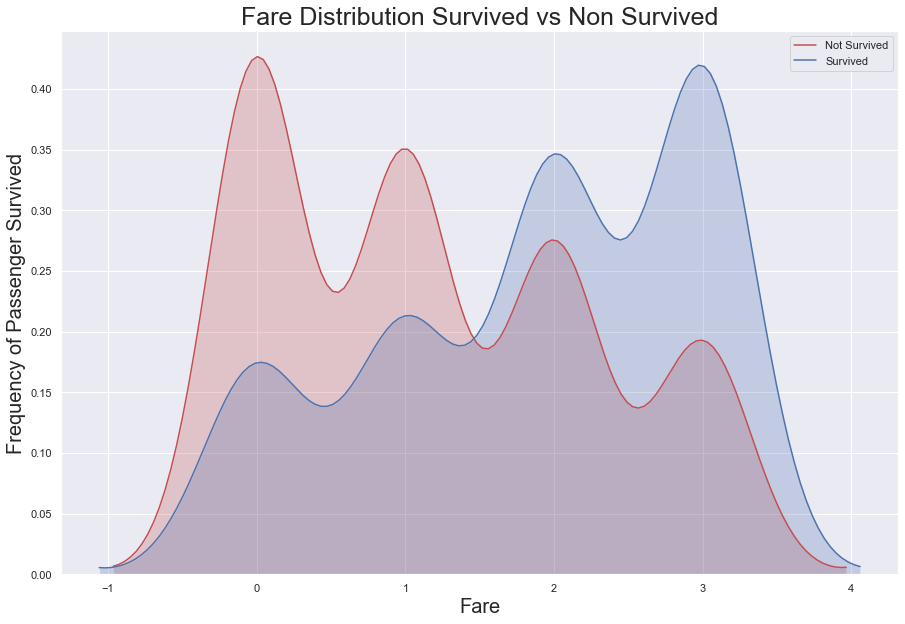

In [29]:
# Fare and survival rates
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

As fares become more expensive, survival becomes higher and higher

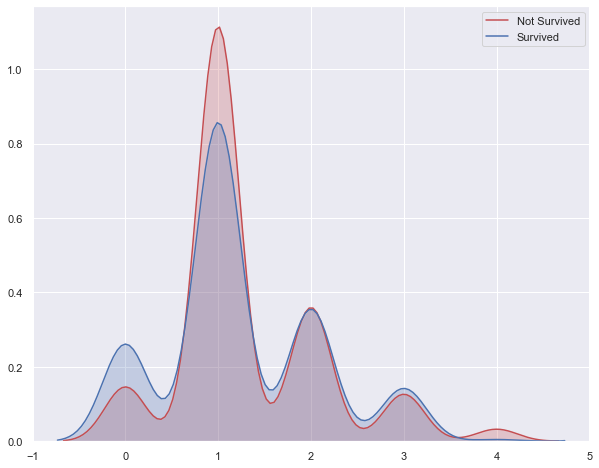

In [30]:
# age and survival rates
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')